## Lecture 14: Pareto Front and Overfitting

Using the example we discussed on Tuesday, we explore the danger of overfitting

In [4]:
import numpy as np
import os

from sklearn import linear_model

import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['xtick.labelsize']=16      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=16      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=1        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

### 1. Pareto Front
For a more detailed discussion, read section 4.5 in the book

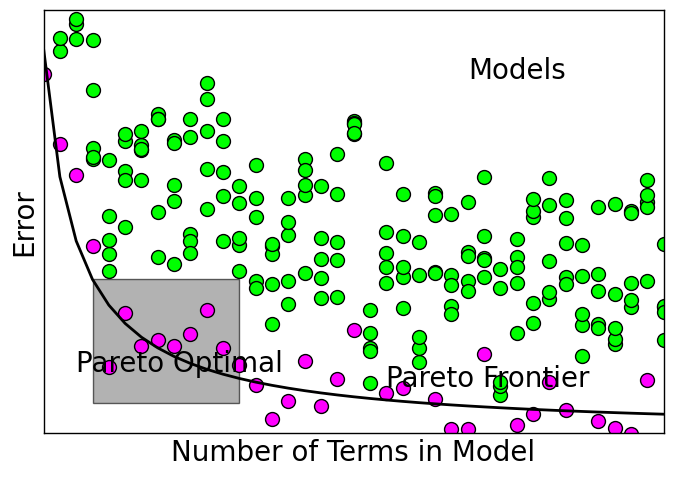

In [ ]:
#@title Code to generate Fig. 4.16 from textbook
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 5.5)

x = np.arange(0.2, 5, 0.1)
y = np.divide(1, x)

x2 = np.copy(x)
n = len(x2)
y2 = np.divide(1,x2) + 0.5*np.random.randn(n)

y3 = (np.tile(y2,(5,1)) + 2*np.random.rand(5,n) + 1)
y3 = np.reshape(y3, -1)
x3 = np.tile(x,(1,5)).reshape(-1)

plt.plot(x,y,color='k',linewidth=2)

rect = Rectangle((0.5,0.4), 0.9, 1.6,linewidth=1, edgecolor='k', facecolor='grey', alpha=0.6)
ax.add_patch(rect)

plt.scatter(x2, y2, 100, color='magenta', edgecolors='k')
plt.scatter(x3, y3, 100, color='lime', edgecolors='k')
plt.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False)
plt.xlabel("Number of Terms in Model", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.text(2.8, 4.6, "Models", fontsize = 20)
plt.text(2.3, 0.6, "Pareto Frontier", fontsize = 20)
plt.text(0.4, 0.8, "Pareto Optimal", fontsize = 20)

plt.xlim(0.2,4)
plt.ylim(0,5.5)

plt.show()

### 2. Overfitting

In many real world examples, the error does not decrease but rather increase when we over fit the data.  Here, we use the example from last class to illustrate the results of overfitting.

#### i. recap from last Tuesday

In [ ]:
x = np.linspace(0, 4, 100)
mu = 0.0
sigma = 0.1
M = 20

### build matrix A to perform regression
A = np.zeros((len(x), M))
for j in range(M):
  A[:,j] = x**j
A_inv = np.linalg.pinv(A) # Least-square fit

### extend x from [0, 4] to [0, 8]
new_x = np.linspace(0, 8, 100)
new_A = np.zeros((len(x), M))
for j in range(M):
  new_A[:,j] = new_x**j

f = x**2 + np.random.normal(mu, sigma, *x.shape)
x_apprx = A_inv @ f
f_apprx = new_A @ x_apprx

fig = plt.figure(figsize = (8, 6), dpi = 80)
plt.semilogy(x, f, linewidth = 2, label = "raw data")
plt.semilogy(new_x, f_apprx, linewidth = 2, label = "fit data", zorder = 0)
plt.legend(frameon = False, fontsize = 18)

plt.show()

#### ii. overfitting error

We are going to systematically compute the overfitting error for the $f(x)=x^2+\mathcal{N}(0,\sigma)$ for different number of polynomial fit.

In [ ]:
n = 200
L = 8
x = np.linspace(0,L,n)
x1 = x[:100]    # Train
x2 = x[100:200] # Test
n1 = len(x1)
n2 = len(x2)
ftrain = x1**2 # Train parabola x = [0,4]
ftest = x2**2  # Test parabola x = [4,8]

fig = plt.figure(figsize = (10, 5), dpi = 80)
plt.plot(x1,ftrain, linewidth=2, label = "Training Data")
plt.plot(x2,ftest, linewidth=2, label = "Testing Data")
plt.legend(frameon = False, fontsize = 18)
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$f(x)$', fontsize = 18)
plt.show()

Now let's look at the error on the training data and testing data as a function of polynomial terms for pseudo-inverse regression.

In [15]:
M = 30 # number of model (polynomial) terms
En_tr = np.zeros((100, M))
En_te = np.zeros((100, M))
for jj in range(M):
  A_tr = np.zeros((n1, jj))
  A_te = np.zeros((n2, jj))
  for j in range(jj):
    A_tr[:,j] = x1**j # training key
    A_te[:,j] = x2**j # testing key

  A_tr_inv = np.linalg.pinv(A_tr)

  f = x**2
  for j in range(100):
    fn_tr = x1**2 + np.random.normal(mu, sigma, *x1.shape) # training
    fn_te = x2**2 + np.random.normal(mu, sigma, *x2.shape) # testing

    x_tr = A_tr_inv = np.linalg.pinv(A_tr) @ fn_tr
    fn_tr_apprx = A_tr @ x_tr
    En_tr[j,jj] = np.linalg.norm(ftrain-fn_tr_apprx, ord=2)/np.linalg.norm(ftrain,ord=2)

    fn_te_apprx = A_te @ x_tr # use loadings from x in [0,4]
    En_te[j,jj] = np.linalg.norm(ftest-fn_te_apprx,ord=2)/np.linalg.norm(ftest,ord=2)

Now we plot the error

In [ ]:
fig,axs = plt.subplots(2,2)
fig.set_size_inches(10, 8)
axs = axs.reshape(-1)

axs[0].boxplot(En_tr, labels = range(M))
axs[0].text(10, 0.6, "Training Data Error", fontsize = 15)
axs[0].set_ylim(0,0.7)
axs[1].boxplot(En_tr, labels = range(M))
axs[1].text(5, 0.015, "Training Data Error Close Up", fontsize = 15)
axs[1].set_ylim(0,0.02)
axs[2].boxplot(En_te, labels = range(M))
axs[2].text(10, 1.5e14, "Testing Data Error", fontsize = 15)
axs[3].boxplot(np.log(En_te+1), labels = range(M))
axs[3].text(1.1, 25, "Testing Data Error Close Up", fontsize = 15)
axs[3].set_ylim(0,30)

for ax in axs:
  ax.set_xticks((1,5,10,15,20,25,30))
  ax.set_xticklabels((1,5,10,15,20,25,30))

plt.show()

### 3. Cross Validation ($k$-fold cross validation)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

n = 100
L = 4
x = np.linspace(0, L, n)
lam = 0.1
mu = 0.0
sigma = 0.1

M = 20 # Polynomial degree
A = np.zeros((n, M))
for j in range(M):
  A[:,j] = x**j # build matrix A

trials = np.array([2, 10, 100])

fig, axs = plt.subplots(3,3)
fig.set_size_inches(9, 9)

for j in range(len(trials)):
  trial = trials[j]
  E1 = np.zeros(trial)
  E2 = np.zeros(trial)
  E3 = np.zeros(trial)

  X1 = np.zeros((M, trial))
  X2 = np.zeros((M, trial))
  X3 = np.zeros((M, trial))

  for jj in range(trial):
    f = x**2 + np.random.normal(mu, sigma, *x.shape)
    x1 = np.linalg.pinv(np.copy(A)) @ np.copy(f)
    f1 = A @ x1
    E1[jj] = np.linalg.norm(f-f1, ord=2)/np.linalg.norm(f, ord=2)

    x2 = np.linalg.lstsq(np.copy(A),np.copy(f),rcond=None)[0]
    f2 = A @ x2
    E2[jj] = np.linalg.norm(f-f2, ord=2)/np.linalg.norm(f, ord=2)

    regr3 = linear_model.Lasso(alpha = lam)
    regr3.fit(A, f)
    x3 = regr3.coef_
    f3 = A @ x3
    E3[jj] = np.linalg.norm(f-f3, ord=2)/np.linalg.norm(f, ord=2)

    X1[:,jj] = x1
    X2[:,jj] = x2
    X3[:,jj] = x3

  X1m = np.mean(X1,axis=1)
  X2m = np.mean(X2,axis=1)
  X3m = np.mean(X3,axis=1)

  Err = np.column_stack((E1,E2,E3))

  if j == 0:
    axs[0,j].set_ylabel("pinv", fontsize = 18)
    axs[1,j].set_ylabel("backslash", fontsize = 18)
    axs[2,j].set_ylabel("LASSO", fontsize = 18)

  axs[0,j].bar(range(M),X1m)
  axs[0,j].set_title("k="+str(trial), fontsize = 18)
  axs[1,j].bar(range(M),X2m)
  axs[2,j].bar(range(M),X3m)

plt.show()